In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [195]:
crime_df = pd.read_csv('./Crime Rate Capstone.csv')

In [196]:
crime_df.isna()

,Incident,RMSOccurrenceDate,RMSOccurrenceHour,NIBRSDescription,OffenseCount,Premise,StreetNo,StreetName,City,ZIPCode
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
184946,False,False,False,False,False,False,False,False,False,False
184947,False,False,False,False,False,False,False,False,False,False
184948,False,False,False,False,False,False,False,False,False,False
184949,False,False,False,False,False,False,False,False,False,False


In [197]:
# Grouping the data by 'ZIPCode' and summing up the 'OffenseCount' for each group

offense_counts_by_zip = crime_df.groupby('ZIPCode')['OffenseCount'].sum().reset_index()

# Sorting the results by 'OffenseCount' in descending order to see the zip codes with the most offenses first

# offense_counts_by_zip = offense_counts_by_zip.sort_values(by='OffenseCount', ascending=False)

# Sort by zip codes
offense_counts_by_zip = offense_counts_by_zip.sort_values(by='ZIPCode')
                                            
# Removing offense counts with less than 10
offense_counts_by_zip_filtered = offense_counts_by_zip[offense_counts_by_zip['OffenseCount'] >= 10]

offense_counts_by_zip_filtered.head(20)

,ZIPCode,OffenseCount
7,77002,4674
8,77003,2136
9,77004,4280
10,77005,614
11,77006,2677
12,77007,4153
13,77008,2792
14,77009,2861
15,77010,291
16,77011,1333


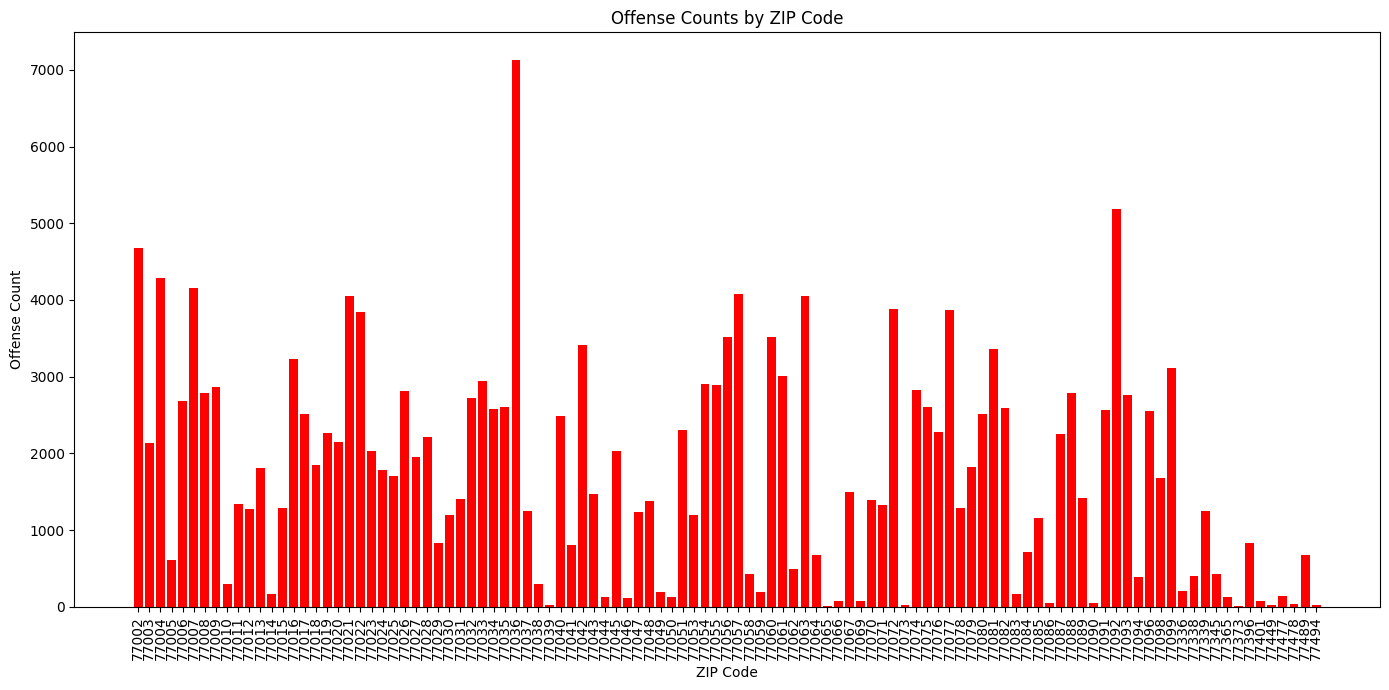

In [198]:
# Creating a bar chart to visualize the offense counts by ZIP code
# Plotting
plt.figure(figsize=(14,7))
plt.bar(offense_counts_by_zip_filtered['ZIPCode'].astype(str), offense_counts_by_zip_filtered['OffenseCount'], color= 'red')
plt.title('Offense Counts by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Offense Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [199]:
# Load the dataset
df_mls = pd.read_csv("./MLS2.csv")

homes_listed_by_zip = df_mls['Zip Code'].value_counts().reset_index()
homes_listed_by_zip.columns = ['Zip Code', 'Number of Homes Listed']

homes_listed_by_zip

,Zip Code,Number of Homes Listed
0,77493,222
1,77433,218
2,77018,90
3,77091,82
4,77375,73
...,...,...
75,77042,1
76,77041,1
77,77023,1
78,77016,1


In [200]:
sum_homes_listed = homes_listed_by_zip['Number of Homes Listed'].sum()

sum_homes_listed

1781

In [201]:
#find the average prices of each home for each zip code and replace the price as an integer

df_mls['List Price'] = df_mls['List Price'].replace('[\$,]', '', regex=True).astype(float)
average_list_price_by_zip = df_mls.groupby('Zip Code')['List Price'].mean().reset_index()

In [202]:
# merge the two df together
df_merged = average_list_price_by_zip.merge(homes_listed_by_zip, on='Zip Code')

# Round the List Price to remove decimal places
df_merged['List Price'] = df_merged['List Price'].astype(int)
df_merged

,Zip Code,List Price,Number of Homes Listed
0,77002,380000,1
1,77003,437026,19
2,77004,436192,45
3,77007,480190,10
4,77008,468219,48
...,...,...,...
75,77546,426950,2
76,77571,416698,26
77,77581,415000,1
78,77586,433835,6


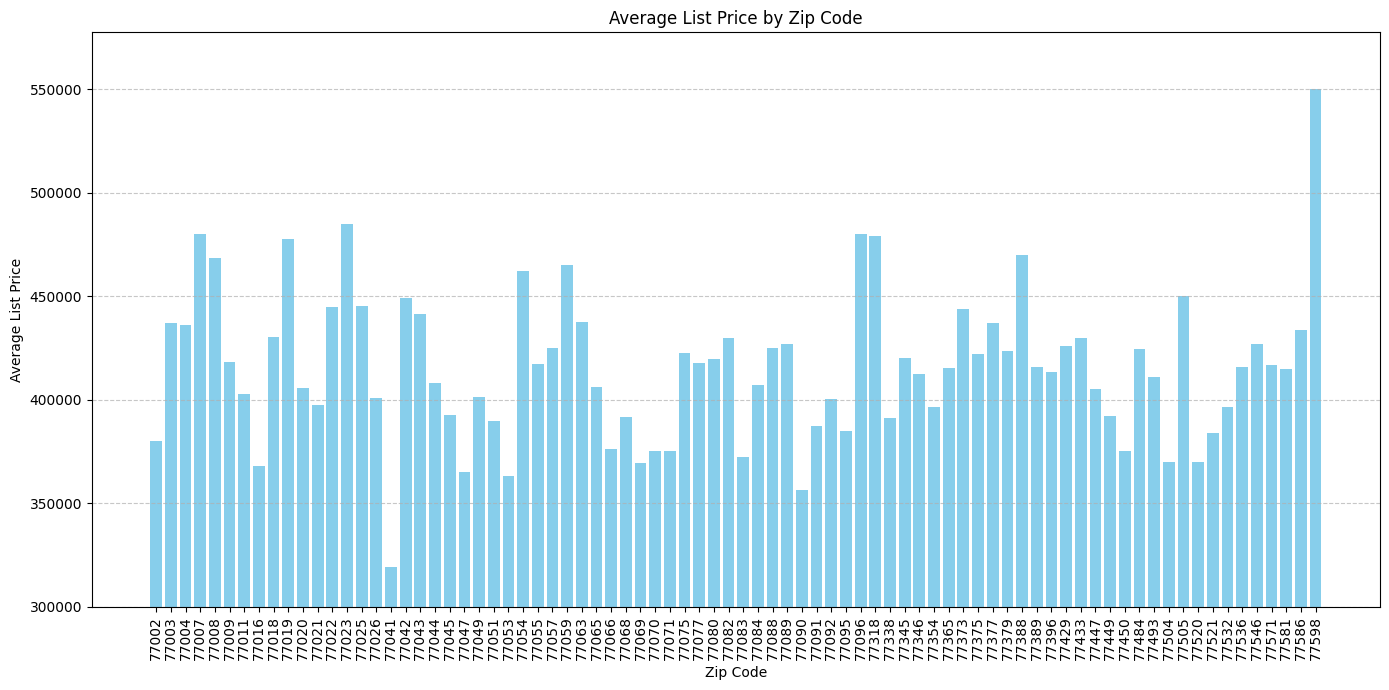

In [203]:
# Create a bar chart of average list price by zip code with clearer formatting

plt.figure(figsize=(14, 7))

#using .astype(str) will condense the chart

plt.bar(df_merged['Zip Code'].astype(str), df_merged['List Price'], color='skyblue')
plt.title('Average List Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average List Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the y-axis limits to start from 300000
plt.ylim(300000, plt.ylim()[1])

# use "tight layout" fit into the figure area and minimizes the overlap between subplots and ensures that the subplots are properly spaced and aligned within the figure. 
plt.tight_layout()
plt.show()

In [204]:
# import matplotlib.pyplot as plt

# # Creating a figure with subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

# # Plotting the first bar chart
# ax1.bar(offense_counts_by_zip_filtered['ZIPCode'].astype(str), offense_counts_by_zip_filtered['OffenseCount'], color='red')
# ax1.set_title('Offense Counts by ZIP Code')
# ax1.set_xlabel('ZIP Code')
# ax1.set_ylabel('Offense Count')
# ax1.set_xticks(offense_counts_by_zip_filtered['ZIPCode'].astype(str))
# ax1.tick_params(axis='x', rotation=90)
# ax1.grid(axis='y', linestyle='--', alpha=0.7)

# # Plotting the second bar chart
# ax2.bar(df_merged['Zip Code'].astype(str), df_merged['List Price'], color='skyblue')
# ax2.set_title('Average List Price by Zip Code')
# ax2.set_xlabel('Zip Code')
# ax2.set_ylabel('Average List Price')
# ax2.set_xticks(df_merged['Zip Code'].astype(str))
# ax2.tick_params(axis='x', rotation=90)
# ax2.grid(axis='y', linestyle='--', alpha=0.7)

# # Set the y-axis limits to start from 300000
# plt.ylim(300000, plt.ylim()[1])

# # Adjust layout to prevent overlapping
# plt.tight_layout()

# # Show the combined chart
# plt.show()


In [205]:
# # Merge datasets on the 'ZIPCode' column
# merged_data = pd.merge(offense_counts_by_zip_filtered, df_merged, left_on='ZIPCode', right_on='Zip Code', how='inner')

# # Normalize the values
# total_offenses = merged_data['OffenseCount'].max()
# total_list_price = merged_data['List Price'].max()

# normalized_offenses = merged_data['OffenseCount'] / total_offenses
# normalized_list_price = merged_data['List Price'] / total_list_price

# # Create figure and axis
# plt.figure(figsize=(14, 7))

# # Define bar width
# bar_width = 0.4

# # Create an array of indices for each ZIP code
# indices = np.arange(len(merged_data))

# # Plotting the first set of bars (Normalized Offense Counts)
# plt.bar(indices - bar_width/2, normalized_offenses, width=bar_width, color='red', label='Normalized Offense Count')

# # Plotting the second set of bars (Normalized Average List Price)
# plt.bar(indices + bar_width/2, normalized_list_price, width=bar_width, color='skyblue', label='Normalized Average List Price')

# # Set labels, title, and legend
# plt.title('Normalized Offense Counts and Normalized Average List Price by ZIP Code')
# plt.xlabel('ZIP Code')
# plt.ylabel('Normalized Value')
# plt.xticks(indices, merged_data['ZIPCode'].astype(str), rotation=90)
# plt.legend()


# # Show the combined normalized grouped bar chart
# plt.tight_layout()
# plt.show()

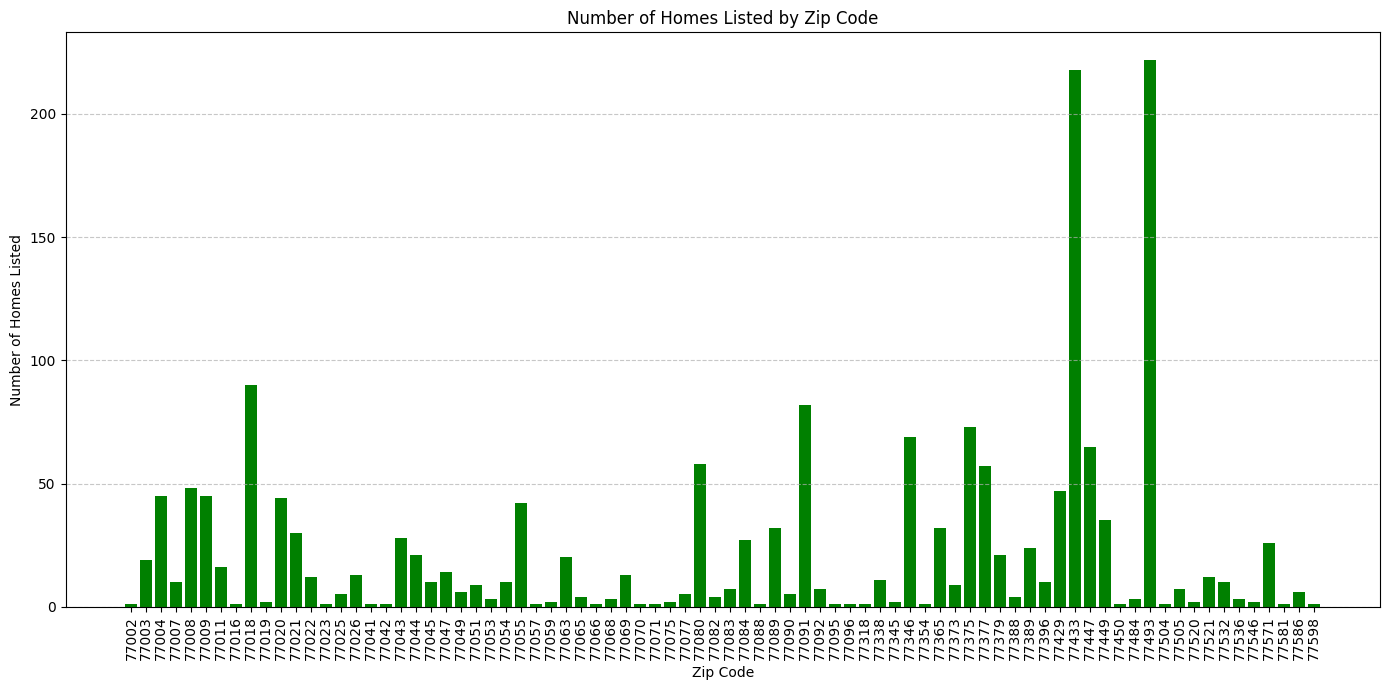

In [206]:
# Create a bar chart of number of homes listed by zip code with clearer formatting
plt.figure(figsize=(14, 7))

# Using .astype(str) will condense the chart
plt.bar(df_merged['Zip Code'].astype(str), df_merged['Number of Homes Listed'], color='green')
plt.title('Number of Homes Listed by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Homes Listed')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimizes the overlap between subplots
# Ensures that the subplots are properly spaced and aligned within the figure.
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
# # Merge datasets on the 'Zip Code' column
# merged_data = pd.merge(offense_counts_by_zip_filtered, homes_listed_by_zip, left_on='ZIPCode', right_on='Zip Code', how='inner')

# # Normalize the values
# total_offenses = merged_data['OffenseCount'].max()
# total_homes_listed = merged_data['Number of Homes Listed'].max()

# normalized_offenses = merged_data['OffenseCount'] / total_offenses
# normalized_homes_listed = merged_data['Number of Homes Listed'] / total_homes_listed

# # Create figure and axis
# plt.figure(figsize=(14, 7))

# # Define bar width
# bar_width = 0.4

# # Create an array of indices for each ZIP code
# indices = np.arange(len(merged_data))

# # Plotting the first set of bars (Normalized Offense Counts)
# plt.bar(indices - bar_width/4, normalized_offenses, width=bar_width/2, color='red', label='Normalized Offense Count')

# # Plotting the second set of bars (Normalized Number of Homes Listed)
# plt.bar(indices + bar_width/4, normalized_homes_listed, width=bar_width/2, color='green', label='Normalized Number of Homes Listed')

# # Set labels, title, and legend
# plt.title('Normalized Crime Incidents and Number of Homes Listed by ZIP Code')
# plt.xlabel('ZIP Code')
# plt.ylabel('Normalized Count')
# plt.xticks(indices, merged_data['ZIPCode'].astype(str), rotation=90)
# plt.legend()

# # Show the combined grouped bar chart
# plt.tight_layout()
# plt.show()

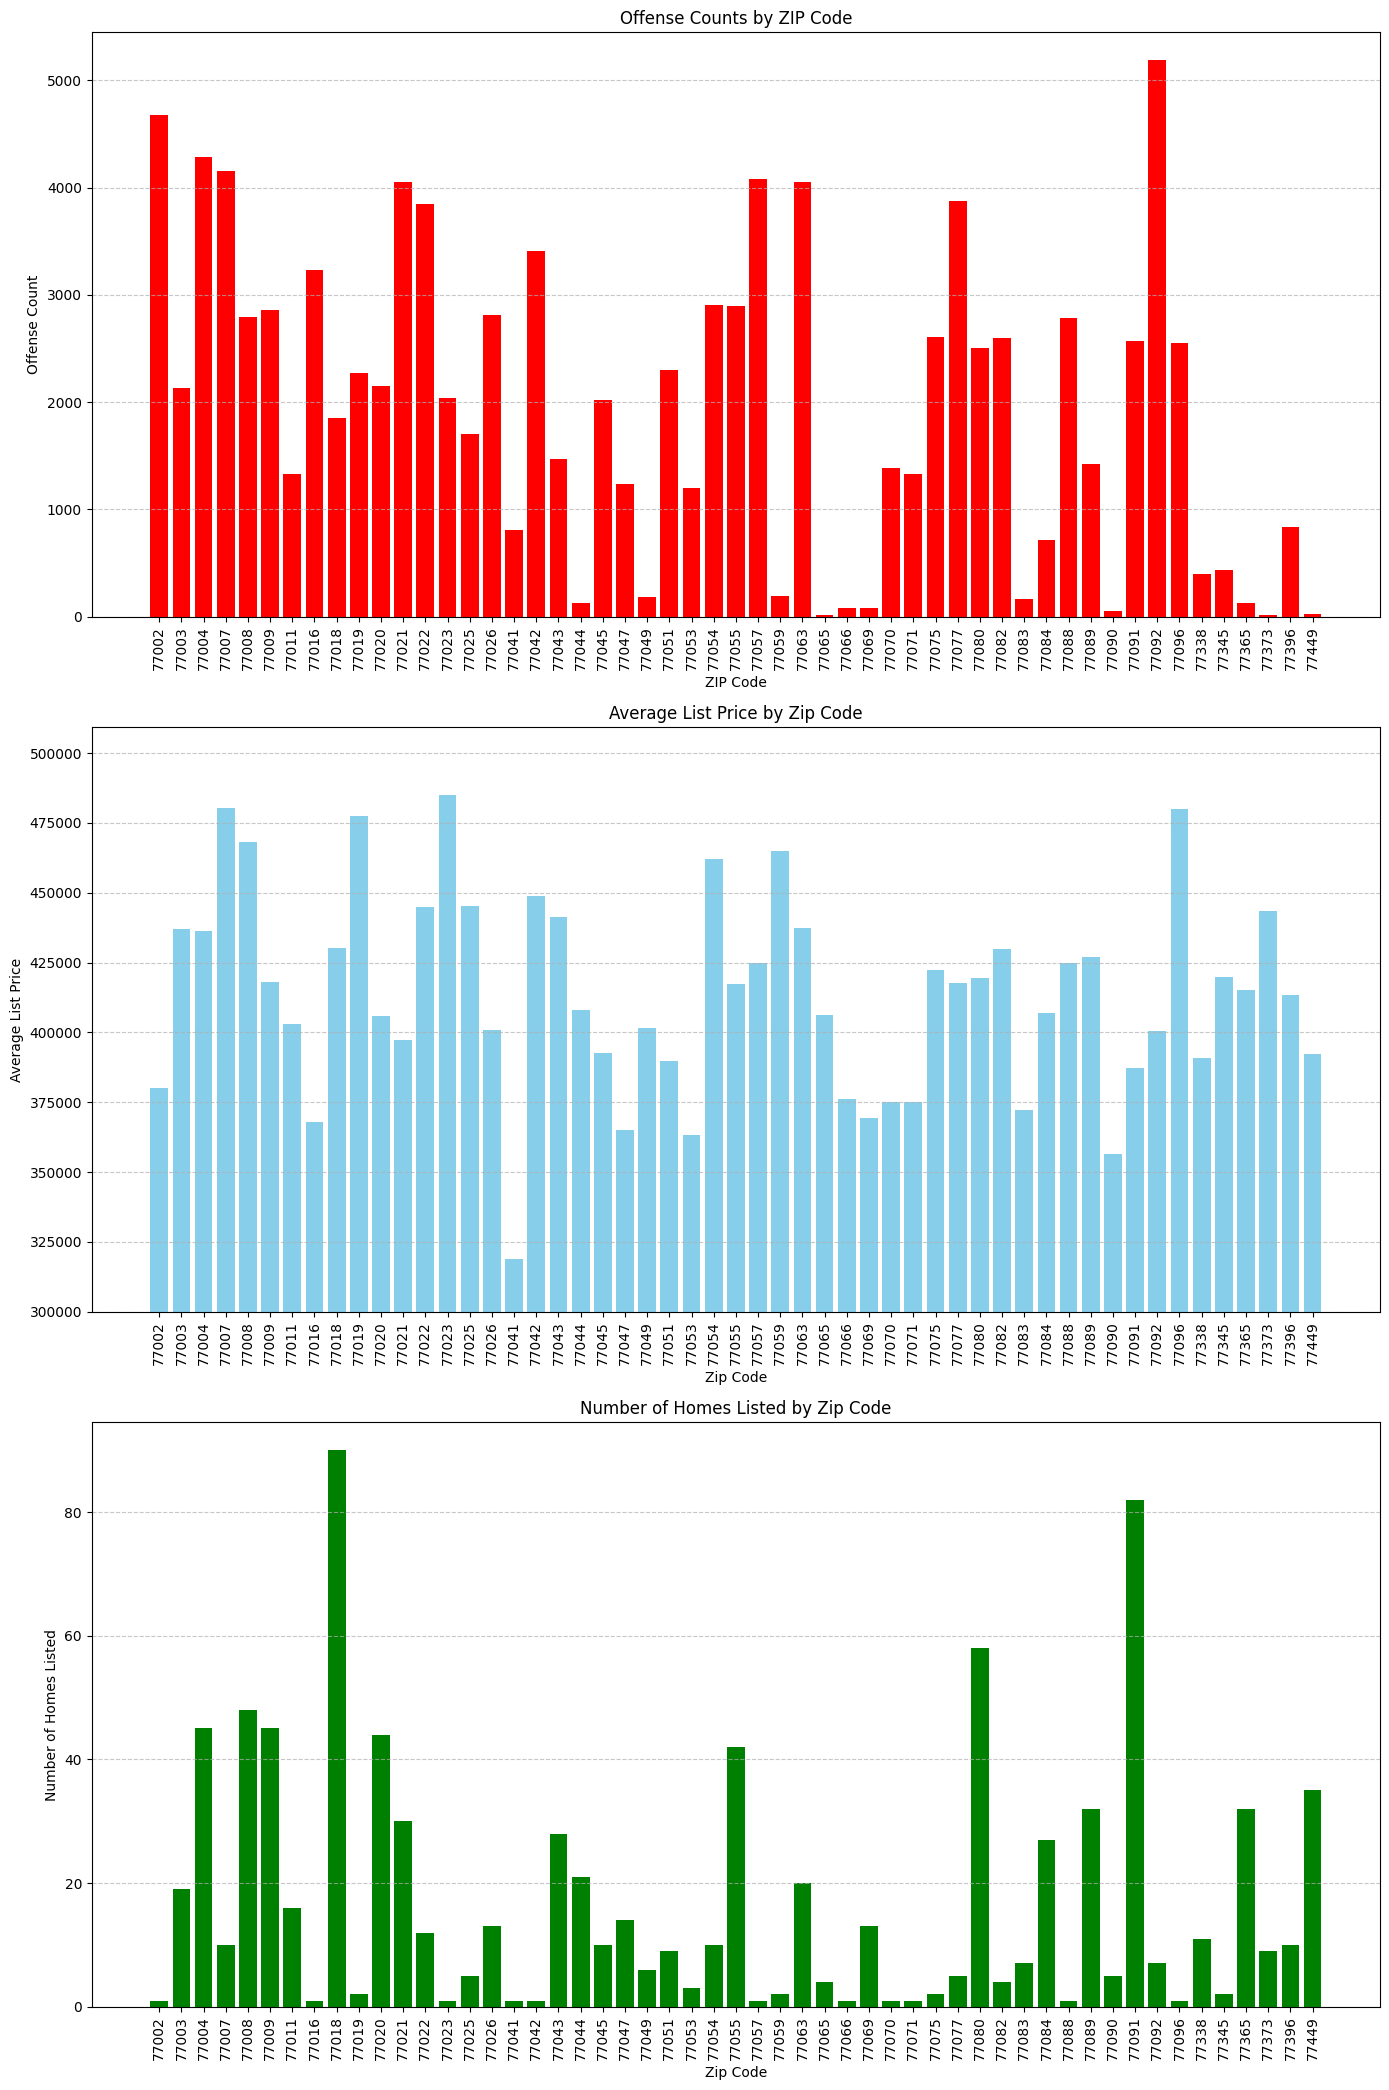

In [208]:
# Merge the data frames based on ZIP codes
merged_df = pd.merge(df_merged, offense_counts_by_zip_filtered, left_on='Zip Code', right_on='ZIPCode', how='left')

# Drop rows where offense count is missing
merged_df = merged_df.dropna(subset=['OffenseCount'])

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(14, 21))

# Plotting the first chart (Offense Counts by ZIP Code)
axs[0].bar(merged_df['Zip Code'].astype(str), merged_df['OffenseCount'], color='red')
axs[0].set_title('Offense Counts by ZIP Code')
axs[0].set_xlabel('ZIP Code')
axs[0].set_ylabel('Offense Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the second chart (Average List Price by ZIP Code)
axs[1].bar(merged_df['Zip Code'].astype(str), merged_df['List Price'], color='skyblue')
axs[1].set_title('Average List Price by Zip Code')
axs[1].set_xlabel('Zip Code')
axs[1].set_ylabel('Average List Price')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_ylim(300000, axs[1].get_ylim()[1])  # Set y-axis limits

# Plotting the third chart (Number of Homes Listed by ZIP Code)
axs[2].bar(merged_df['Zip Code'].astype(str), merged_df['Number of Homes Listed'], color='green')
axs[2].set_title('Number of Homes Listed by Zip Code')
axs[2].set_xlabel('Zip Code')
axs[2].set_ylabel('Number of Homes Listed')
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout to prevent overlapping
plt.tight_layout()

# Show the combined chart
plt.show()

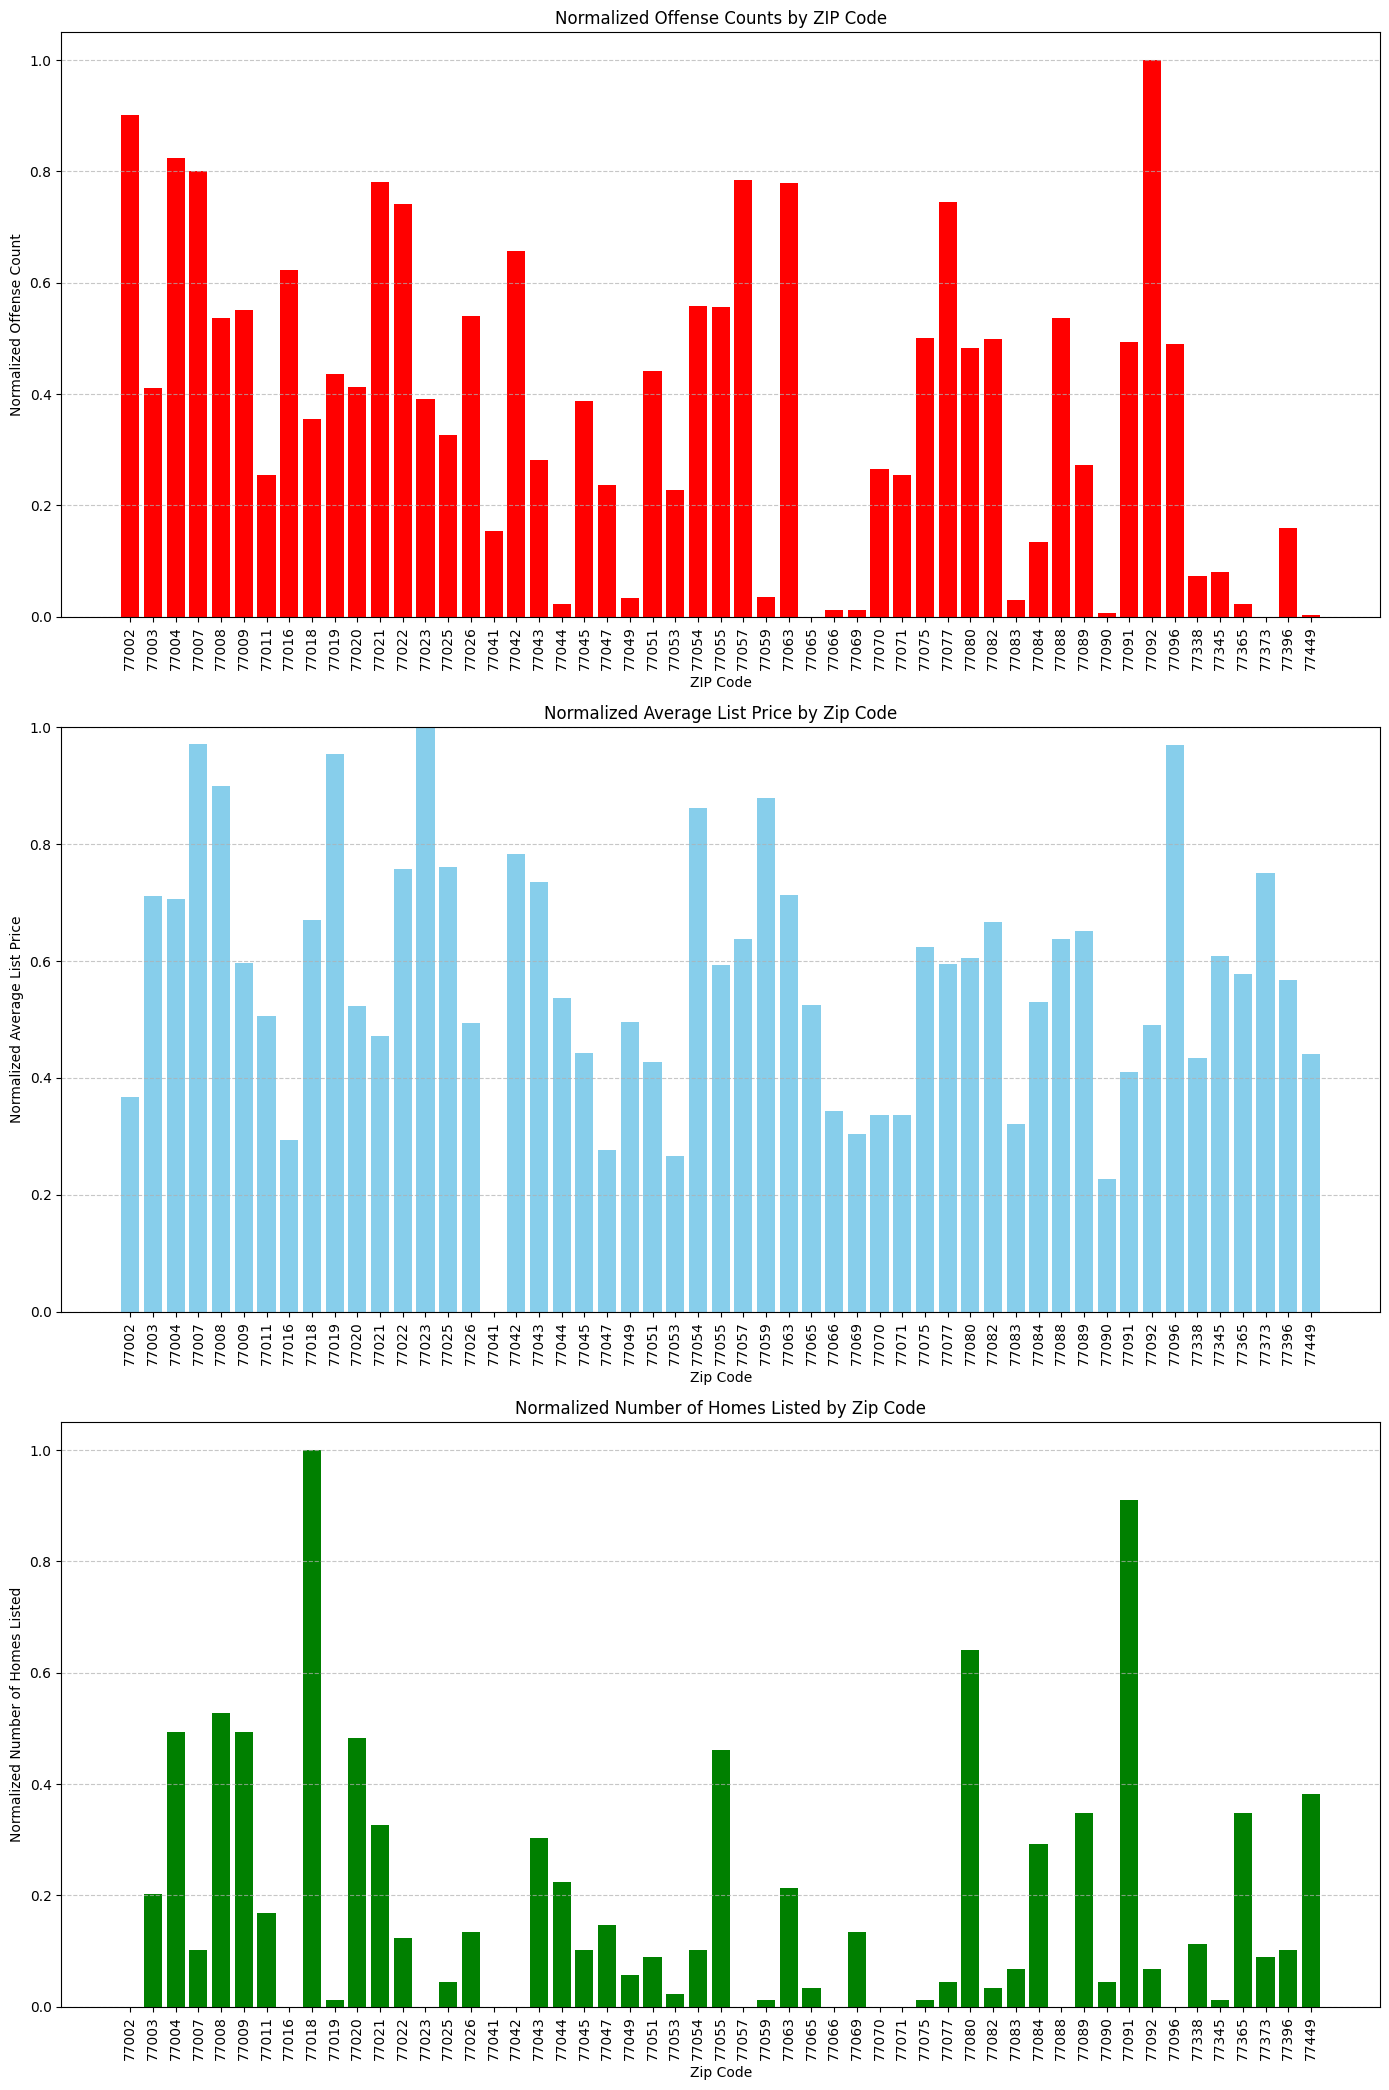

In [209]:
# Merge the data frames based on ZIP codes
merged_df = pd.merge(df_merged, offense_counts_by_zip_filtered, left_on='Zip Code', right_on='ZIPCode', how='left')

# Drop rows where offense count is missing
merged_df = merged_df.dropna(subset=['OffenseCount'])

# Normalize data for each group
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

merged_df['OffenseCount'] = normalize(merged_df['OffenseCount'])
merged_df['List Price'] = normalize(merged_df['List Price'])
merged_df['Number of Homes Listed'] = normalize(merged_df['Number of Homes Listed'])

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(14, 21))

# Plotting the first chart (Offense Counts by ZIP Code)
axs[0].bar(merged_df['Zip Code'].astype(str), merged_df['OffenseCount'], color='red')
axs[0].set_title('Normalized Offense Counts by ZIP Code')
axs[0].set_xlabel('ZIP Code')
axs[0].set_ylabel('Normalized Offense Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the second chart (Average List Price by ZIP Code)
axs[1].bar(merged_df['Zip Code'].astype(str), merged_df['List Price'], color='skyblue')
axs[1].set_title('Normalized Average List Price by Zip Code')
axs[1].set_xlabel('Zip Code')
axs[1].set_ylabel('Normalized Average List Price')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].set_ylim(0, 1)  # Set y-axis limits

# Plotting the third chart (Number of Homes Listed by ZIP Code)
axs[2].bar(merged_df['Zip Code'].astype(str), merged_df['Number of Homes Listed'], color='green')
axs[2].set_title('Normalized Number of Homes Listed by Zip Code')
axs[2].set_xlabel('Zip Code')
axs[2].set_ylabel('Normalized Number of Homes Listed')
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Use tight layout to prevent overlapping
plt.tight_layout()

# Show the combined chart
plt.show()


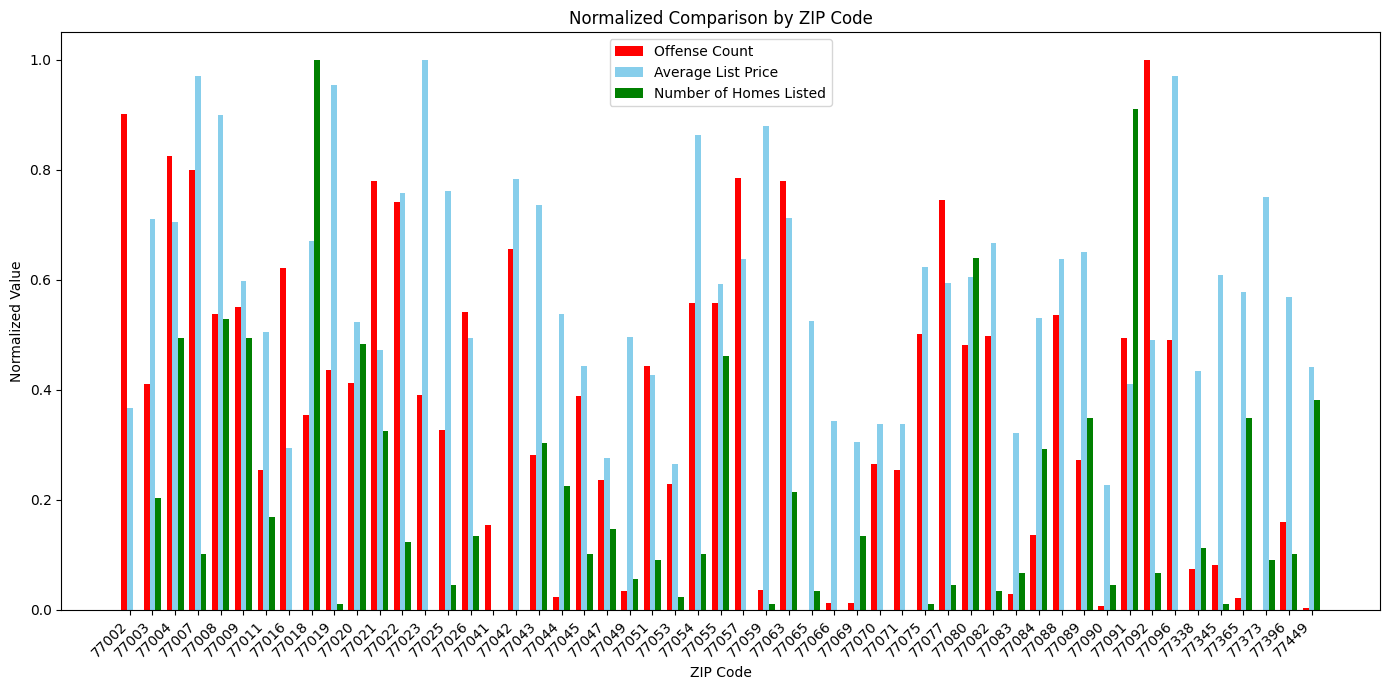

In [210]:
# Merge the data frames based on ZIP codes
merged_df = pd.merge(df_merged, offense_counts_by_zip_filtered, left_on='Zip Code', right_on='ZIPCode', how='left')

# Drop rows where offense count is missing
merged_df = merged_df.dropna(subset=['OffenseCount'])

# Normalize data for each group
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

merged_df['OffenseCount'] = normalize(merged_df['OffenseCount'])
merged_df['List Price'] = normalize(merged_df['List Price'])
merged_df['Number of Homes Listed'] = normalize(merged_df['Number of Homes Listed'])

# Create a grouped bar chart with normalized values
bar_width = 0.25
bar_positions = np.arange(len(merged_df['Zip Code']))

plt.figure(figsize=(14, 7))

plt.bar(bar_positions - bar_width, merged_df['OffenseCount'], width=bar_width, color='red', label='Offense Count')
plt.bar(bar_positions, merged_df['List Price'], width=bar_width, color='skyblue', label='Average List Price')
plt.bar(bar_positions + bar_width, merged_df['Number of Homes Listed'], width=bar_width, color='green', label='Number of Homes Listed')

plt.title('Normalized Comparison by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Normalized Value')

plt.xticks(bar_positions, merged_df['Zip Code'].astype(str), rotation=45, ha='right')  # Rotate and align the x-axis ticks

plt.legend()
plt.tight_layout()

# Show the combined chart
plt.show()

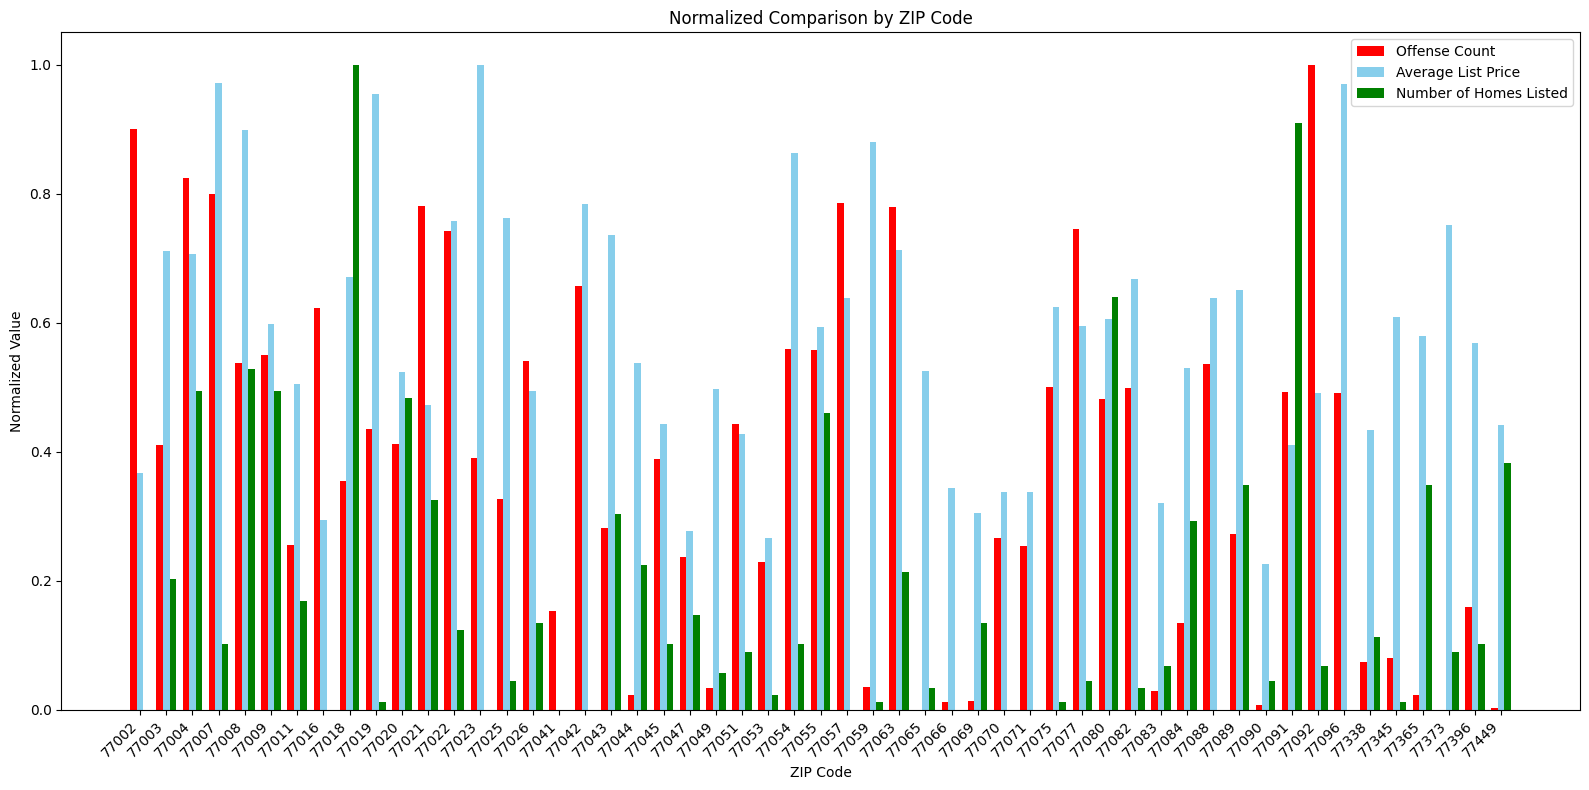

In [211]:
# Merge the data frames based on ZIP codes
merged_df = pd.merge(df_merged, offense_counts_by_zip_filtered, left_on='Zip Code', right_on='ZIPCode', how='left')

# Drop rows where offense count is missing
merged_df = merged_df.dropna(subset=['OffenseCount'])

# Normalize data for each group
normalized_offense = (merged_df['OffenseCount'] - merged_df['OffenseCount'].min()) / (merged_df['OffenseCount'].max() - merged_df['OffenseCount'].min())
normalized_list_price = (merged_df['List Price'] - merged_df['List Price'].min()) / (merged_df['List Price'].max() - merged_df['List Price'].min())
normalized_homes_listed = (merged_df['Number of Homes Listed'] - merged_df['Number of Homes Listed'].min()) / (merged_df['Number of Homes Listed'].max() - merged_df['Number of Homes Listed'].min())

# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(figsize=(16, 8))

# Set the width of the bars
bar_width = 0.25

# Set the positions for the bars
bar_positions = np.arange(len(merged_df['Zip Code']))

# Plotting the normalized bars side by side with improved aesthetics
ax.bar(bar_positions - bar_width, normalized_offense, width=bar_width, color='red', label='Offense Count')
ax.bar(bar_positions, normalized_list_price, width=bar_width, color='skyblue', label='Average List Price')
ax.bar(bar_positions + bar_width, normalized_homes_listed, width=bar_width, color='green', label='Number of Homes Listed')

# Set the title and labels
ax.set_title('Normalized Comparison by ZIP Code')
ax.set_xlabel('ZIP Code')
ax.set_ylabel('Normalized Value')

# Set legend
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(merged_df['Zip Code'].astype(str), rotation=45, ha='right')  # Rotate and align the x-axis ticks

# Use tight layout to prevent overlapping
plt.tight_layout()

# Show the combined chart
plt.show()


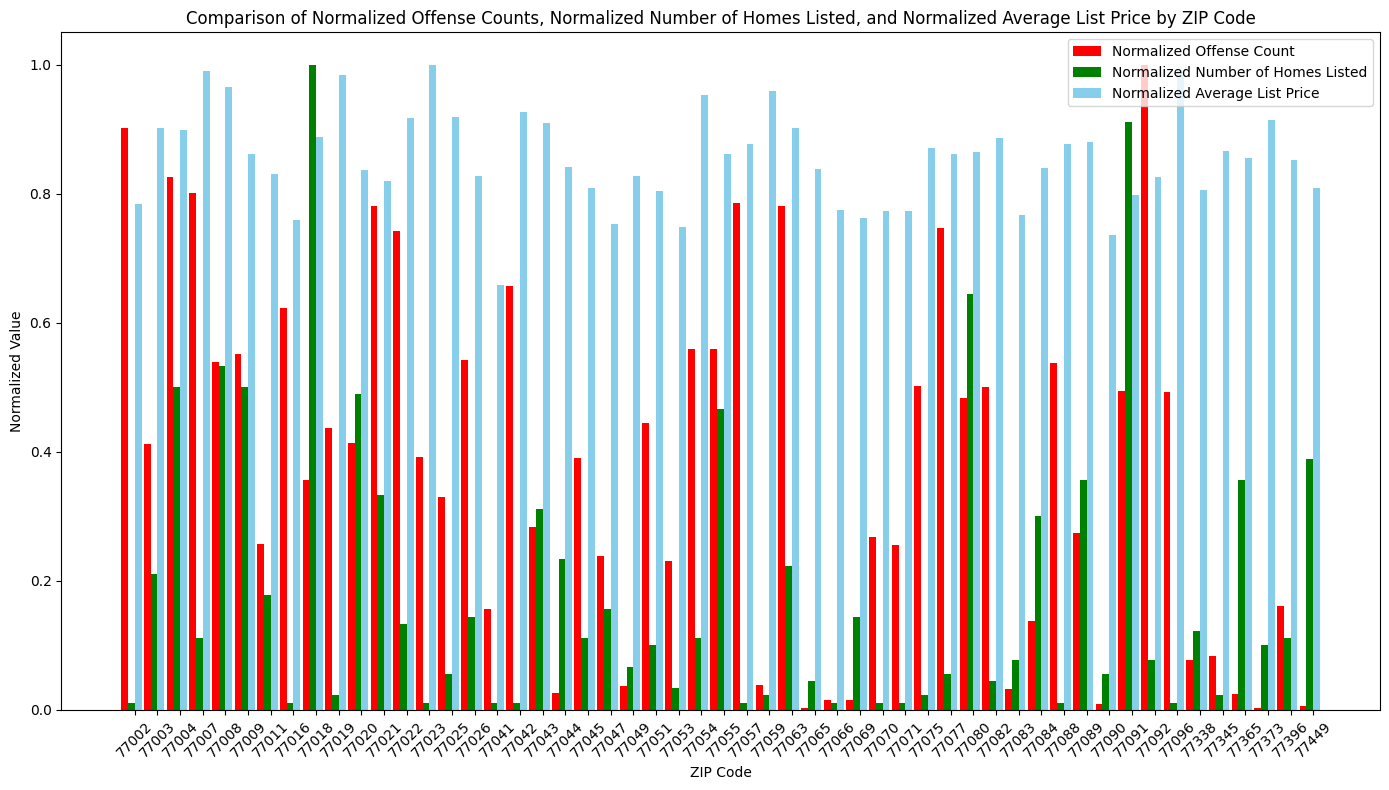

In [213]:
# Merge datasets on the 'ZIPCode' column for both charts
merged_data1 = pd.merge(offense_counts_by_zip_filtered, df_merged, left_on='ZIPCode', right_on='Zip Code', how='inner')
merged_data2 = pd.merge(offense_counts_by_zip_filtered, homes_listed_by_zip, left_on='ZIPCode', right_on='Zip Code', how='inner')

# Normalize values for both charts
total_offenses1 = merged_data1['OffenseCount'].max()
total_list_price1 = merged_data1['List Price'].max()
total_offenses2 = merged_data2['OffenseCount'].max()
total_homes_listed2 = merged_data2['Number of Homes Listed'].max()

normalized_offenses1 = merged_data1['OffenseCount'] / total_offenses1
normalized_list_price1 = merged_data1['List Price'] / total_list_price1
normalized_offenses2 = merged_data2['OffenseCount'] / total_offenses2
normalized_homes_listed2 = merged_data2['Number of Homes Listed'] / total_homes_listed2

# Create figure and axis
plt.figure(figsize=(14, 8))

# Define bar width
bar_width = 0.3

# Create an array of indices for each ZIP code
indices1 = np.arange(len(merged_data1))
indices2 = np.arange(len(merged_data2))

# Plotting the first set of bars (Normalized Offense Counts)
plt.bar(indices1 - bar_width, normalized_offenses1, width=bar_width, color='red', label='Normalized Offense Count')

# Plotting the second set of bars (Normalized Number of Homes Listed)
plt.bar(indices2, normalized_homes_listed2, width=bar_width, color='green', label='Normalized Number of Homes Listed')

# Plotting the third set of bars (Normalized Average List Price)
plt.bar(indices1 + bar_width, normalized_list_price1, width=bar_width, color='skyblue', label='Normalized Average List Price')

# Set labels, title, and legend
plt.title('Comparison of Normalized Offense Counts, Normalized Number of Homes Listed, and Normalized Average List Price by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Normalized Value')
plt.xticks(indices1 + bar_width/2, merged_data1['ZIPCode'].astype(str), rotation=45)
plt.legend()

# Show the combined chart
plt.tight_layout()
plt.show()